In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import folium

import matplotlib.pyplot as plt # 시각화 지원
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False
plt.rcParams["figure.figsize"]=(12,5)

In [6]:
road =pd.read_csv('data/도로교통공단_전국_사망교통사고정보(2018).csv',encoding='euc-kr',index_col="발생년")
road

,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
발생년,,,,,,,,,,,,,,,,,,,,,
2018,2018021406,35,주,수,1,1,0,0,0,서울,...,단일로,기타단일로,승용차,승용차,보행자,보행자,950497.0,1954702.0,126.939274,37.590388
2018,2018090205,23,야,일,1,1,0,0,0,서울,...,교차로,교차로횡단보도내,승용차,승용차,보행자,보행자,953337.0,1950150.0,126.971732,37.549508
2018,2018121522,35,야,토,1,1,0,0,0,서울,...,단일로,기타단일로,이륜차,이륜차,없음,없음,956967.0,1954807.0,127.012552,37.591659
2018,2018082311,30,주,목,1,1,0,0,0,서울,...,단일로,기타단일로,승합차,승합차,없음,없음,958020.0,1959193.0,127.024227,37.631240
2018,2018071600,50,야,월,1,1,0,0,0,서울,...,교차로,교차로횡단보도내,화물차,화물차,보행자,보행자,957606.0,1958258.0,127.019590,37.622794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,2018052103,55,야,월,1,1,0,0,0,경기,...,단일로,기타단일로,승용차,승용차,없음,없음,973070.0,1988564.0,127.193701,37.896529
2018,2018060808,43,주,금,1,1,0,0,0,경기,...,단일로,기타단일로,화물차,화물차,농기계,농기계,979900.0,2006212.0,127.270890,38.055765
2018,2018012010,15,주,토,1,1,0,0,0,경기,...,단일로,기타단일로,승용차,승용차,없음,없음,1001226.0,1959902.0,127.513896,37.638589


In [56]:
# 1. 서울에서 일어난 요일별 사망자수, 사상자수를 출력하시오.
seoul = road[road['발생지시도'] == '서울']

g = seoul.groupby('요일')
g.sum()[['사망자수', '사상자수']]

,사망자수,사상자수
요일,,
금,38,52
목,52,76
수,37,48
월,53,84
일,37,58
토,46,62
화,41,45


In [60]:
# 2. 서울 강북구 지역의 교통사고 위치를 지도로 표시하고 각 마커에는 법규위반내용을 표시하시오.
gangbuk = seoul[seoul['발생지시군구']=='강북구'][['법규위반','경도','위도']]
# gangbuk.values

map=folium.Map(location=[37.63123983, 127.0242273 ],zoom_start=14)

for n1,n2,n3 in gangbuk.values:
    mk=folium.Marker([n3,n2],popup=n1)
    print(mk)
    mk.add_to(map)
    
map

In [28]:
# 3. 부산에서 발생한 총 사망자 수를 구하시오.
busan=road[road['발생지시도']=='부산']

print('부산사망자수',busan['사망자수'].sum())

부산사망자수 123


In [29]:
# 4. 서울지역 월요일에 발생한 사상자수 사고유형 법규위반을 구하시오.
Seoul=road[road['발생지시도']=='서울']
Seoul[['발생지시도','요일','사상자수','사고유형','법규위반']]

,발생지시도,요일,사상자수,사고유형,법규위반
발생년,,,,,
2018,서울,수,1,횡단중,안전운전 의무 불이행
2018,서울,일,1,횡단중,안전운전 의무 불이행
2018,서울,토,1,공작물충돌,안전운전 의무 불이행
2018,서울,목,1,기타,기타(운전자법규위반)
2018,서울,월,1,기타,안전운전 의무 불이행
...,...,...,...,...,...
2018,서울,화,1,차도통행중,안전운전 의무 불이행
2018,서울,월,2,측면충돌,교차로 통행방법 위반
2018,서울,목,1,기타,안전운전 의무 불이행


In [14]:
# 5.횡단중 일어난 사고의 요일 발생지시도, 법규위반, 피해자_당사자종별
road1=road[road['사고유형_중분류'] == '횡단중']
road1[['발생년월일시','발생지시도','법규위반','피해자_당사자종별','사고유형_중분류']]

,발생년월일시,발생지시도,법규위반,피해자_당사자종별,사고유형_중분류
발생년,,,,,
2018,2018021406,서울,안전운전 의무 불이행,보행자,횡단중
2018,2018090205,서울,안전운전 의무 불이행,보행자,횡단중
2018,2018123004,서울,안전운전 의무 불이행,보행자,횡단중
2018,2018012907,서울,신호위반,보행자,횡단중
2018,2018051104,서울,과속,보행자,횡단중
...,...,...,...,...,...
2018,2018122020,경기,보행자 보호의무 위반,보행자,횡단중
2018,2018062213,경기,신호위반,보행자,횡단중
2018,2018122217,경기,안전운전 의무 불이행,보행자,횡단중


In [50]:
    road =pd.read_csv('data/도로교통공단_전국_사망교통사고정보(2018).csv',encoding='euc-kr',index_col="발생년")
    seoul = road[road['발생지시도'] == '서울']
    g = seoul.groupby('요일')
    seoulsum=g.sum()[['사망자수', '사상자수']]
    print(seoulsum.values)
    seoulsum.index
    

[[38 52]
 [52 76]
 [37 48]
 [53 84]
 [37 58]
 [46 62]
 [41 45]]


Index(['금', '목', '수', '월', '일', '토', '화'], dtype='object', name='요일')

array([['강남구', 2780, 1292, 430, 584, 932],
       ['강동구', 773, 379, 99, 155, 377],
       ['강북구', 748, 369, 120, 138, 204],
       ['강서구', 884, 388, 258, 184, 81],
       ['관악구', 1496, 846, 260, 390, 613],
       ['광진구', 707, 573, 78, 53, 174],
       ['구로구', 1561, 1142, 173, 246, 323],
       ['금천구', 1015, 674, 51, 269, 354],
       ['노원구', 1265, 542, 57, 451, 516],
       ['도봉구', 485, 238, 159, 42, 386],
       ['동대문구', 1294, 1070, 23, 198, 579],
       ['동작구', 1091, 544, 341, 103, 314],
       ['마포구', 574, 314, 118, 169, 379],
       ['서대문구', 962, 844, 50, 68, 292],
       ['서초구', 1930, 1406, 157, 336, 398],
       ['성동구', 1062, 730, 91, 241, 265],
       ['성북구', 1464, 1009, 78, 360, 204],
       ['송파구', 618, 529, 21, 68, 463],
       ['양천구', 2034, 1843, 142, 30, 467],
       ['영등포구', 904, 495, 214, 195, 373],
       ['용산구', 1624, 1368, 218, 112, 398],
       ['은평구', 1873, 1138, 224, 278, 468],
       ['종로구', 1002, 464, 314, 211, 630],
       ['중구', 671, 413, 190, 72, 348],
       [

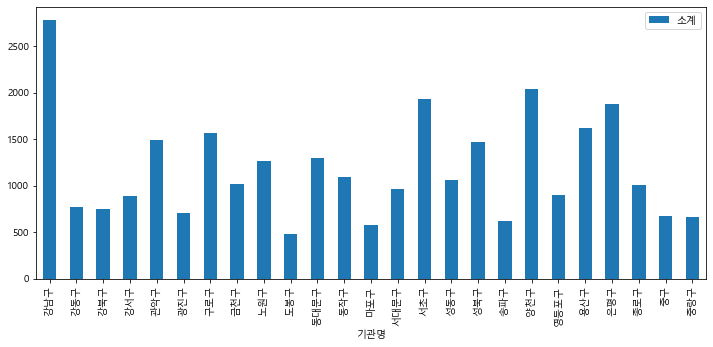

In [46]:
df=pd.read_csv('data/CCTV_in_Seoul.csv')
cctvTotal=df['소계'].sum()
df[['기관명','소계']].plot(x='기관명',kind='bar')
df.values
   